# Lambda School Data Science - Logistic Regression

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

## Lecture - Where Linear goes Wrong
### Return of the Titanic 🚢

You've likely already explored the rich dataset that is the Titanic - let's use regression and try to predict survival with it. The data is [available from Kaggle](https://www.kaggle.com/c/titanic/data), so we'll also play a bit with [the Kaggle API](https://github.com/Kaggle/kaggle-api).

### Get data, option 1: Kaggle API

#### Sign up for Kaggle and get an API token
1. [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. 
2. [Follow these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to create a Kaggle “API Token” and download your `kaggle.json` file. If you are using Anaconda, put the file in the directory specified in the instructions.

_This will enable you to download data directly from Kaggle. If you run into problems, don’t worry — I’ll give you an easy alternative way to download today’s data, so you can still follow along with the lecture hands-on. And then we’ll help you through the Kaggle process after the lecture._

#### Put `kaggle.json` in the correct location

- ***If you're using Anaconda,*** put the file in the directory specified in the [instructions](https://github.com/Kaggle/kaggle-api#api-credentials).

- ***If you're using Google Colab,*** upload the file to your Google Drive, and run this cell:

#### Install the Kaggle API package and use it to get the data

You also have to join the Titanic competition to have access to the data

In [4]:
!kaggle competition download -c titanic

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'competition' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


### Get data, option 2: Download from the competition page
1. [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. 
2. [Go to the Titanic competition page](https://www.kaggle.com/c/titanic) to download the [data](https://www.kaggle.com/c/titanic/data).

### Get data, option 3: Use Seaborn

```
import seaborn as sns
train = sns.load_dataset('titanic')
```

But Seaborn's version of the Titanic dataset is not identical to Kaggle's version, as we'll see during this lesson!

### Read data

In [6]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.describe(exclude='number')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mr. John Borland Jr",male,CA. 2343,G6,S
freq,1,577,7,4,644


### How would we try to do this with linear regression?

https://scikit-learn.org/stable/modules/impute.html

In [11]:
from sklearn.linear_model import LinearRegression

features = ['Pclass', 'Age', 'Fare']
target = 'Survived'
X_train = train[features]
y_train = train[target]
X_test = test[features]

train.shape, X_train.shape, y_train.shape, X_test.shape

((891, 12), (891, 3), (891,), (418, 3))

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)

# Applies same thing that was learned on the train set
X_test_imputed = imputer.transform(X_test)

In [22]:
X_train.shape, X_train_imputed.shape, X_test_imputed.shape

((891, 3), (891, 3), (418, 3))

In [23]:
X_train.isnull().sum().sum()

177

In [25]:
linreg = LinearRegression()
linreg.fit(X_train_imputed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
import numpy as np

test_case = np.array([[1, 5, 500]]) #Rich 5-year old in first class
linreg.predict(test_case)

array([1.19207871])

In [27]:
y_pred = linreg.predict(X_test_imputed)

In [31]:
pd.Series(y_pred).describe()

count    418.000000
mean       0.392117
std        0.181876
min        0.011755
25%        0.227341
50%        0.339570
75%        0.516439
max        0.954827
dtype: float64

In [29]:
pd.Series(linreg.coef_, X_train.columns)

Pclass   -0.210390
Age      -0.007358
Fare      0.000751
dtype: float64

In [32]:
linreg.intercept_

1.0638995000035438

### How would we do this with Logistic Regression?

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train_imputed, y_train)

print( logreg.predict(test_case) )
print( logreg.predict_proba(test_case) )

[1]
[[0.02778799 0.97221201]]


In [43]:
threshold = 0.5
manual_predictions = (logreg.predict_proba(X_test_imputed)[:, 1] > threshold ).astype(int)

In [44]:
direct_predictions = logreg.predict(X_test_imputed)

all(manual_predictions == direct_predictions)

True

### How accurate is the Logistic Regression?

In [45]:
score = logreg.score(X_train_imputed, y_train)
print('Train Accuracy Score:', score)

Train Accuracy Score: 0.7025813692480359


In [46]:
y_pred = logreg.predict(X_train_imputed)

In [47]:
len(y_pred)

891

In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train_imputed, y_train, cv=10)
print(scores)

[0.63333333 0.62222222 0.68539326 0.71910112 0.69662921 0.69662921
 0.76404494 0.75280899 0.73033708 0.71590909]


In [50]:
scores.min(), scores.mean(), scores.max()

(0.6222222222222222, 0.7016408466689366, 0.7640449438202247)

### What's the math for the Logistic Regression?

https://en.wikipedia.org/wiki/Logistic_function

https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In [56]:
# The logistic sigmoid 'squishing' function
# implemented to work with numpy arrays
def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [57]:
sigmoid( np.dot(logreg.coef_, test_case.T) + logreg.intercept_ )

array([[0.97221201]])

## Feature Engineering

Get the [Category Encoder](http://contrib.scikit-learn.org/categorical-encoding/) library

If you're running on Google Colab:

```
!pip install category_encoders
```

If you're running locally with Anaconda:

```
!conda install -c conda-forge category_encoders
```

In [58]:
import seaborn as sns
sns_titanic = sns.load_dataset('titanic')
print(sns_titanic.shape)

(891, 15)


In [59]:
train.shape

(891, 12)

In [60]:
sns_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
import category_encoders as ce

In [65]:
binary_encoder = ce.BinaryEncoder()
binary_encoder.fit_transform(sns_titanic['sex'])

#binary_encoder.transform(sns_titanic['sex'])

,sex_0,sex_1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


## Assignment: real-world classification

We're going to check out a larger dataset - the [FMA Free Music Archive data](https://github.com/mdeff/fma). It has a selection of CSVs with metadata and calculated audio features that you can load and try to use to classify genre of tracks. To get you started:

### Get and unzip the data

#### Windows
- Download the [zip file](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip)
- You may need to use [7zip](https://www.7-zip.org/download.html) to unzip it


#### Mac
- Download the [zip file](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip)
- You may need to use [p7zip](https://superuser.com/a/626731) to unzip it

### Look at first 3 lines of raw file

In [ ]:
!head -n 3 fma_metadata/tracks.csv

### Read with pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [80]:
df = pd.read_csv('tracks.csv', skiprows=1, index_col=0, engine='python', error_bad_lines=False)

Skipping line 53396: unexpected end of data


In [112]:
df.sample(5).T

,58530,70237,18926,30051,22560
comments,0,-1,0,0,0
date_created,2012-01-09 20:48:50,NaN,2009-09-22 03:20:12,2010-05-14 11:29:43,2009-12-21 18:59:35
date_released,NaN,NaN,2009-05-01 00:00:00,NaN,NaN
engineer,NaN,NaN,Phleg,NaN,NaN
favorites,0,-1,0,0,1
id,10790,-1,4319,6391,4962
information,"<p><span class=""Apple-style-span"" style=""font-...",NaN,"<p>This metalhead duo from Surabaya, Indonesia...",NaN,"<p>(via <a title=""http://dasandereselbst.org/x..."
listens,4305,-1,6075,16069,5950
producer,NaN,NaN,Phleg,NaN,NaN
tags,"['rock', 'noise rock', 'grindcore']",[],[],[],[]


In [113]:
df.shape

(53393, 52)

In [114]:
df.isnull().sum()

comments                 1
date_created          1725
date_released        17753
engineer             44269
favorites                1
id                       1
information          11375
listens                  1
producer             42872
tags                     1
title                  583
tracks                   1
type                  2321
active_year_begin    40237
active_year_end      50260
associated_labels    44742
bio                  16782
comments.1               1
date_created.1         278
favorites.1              1
id.1                     1
latitude             19168
location             18392
longitude            19168
members              27559
name                     1
related_projects     45403
tags.1                   1
website              12991
wikipedia_page       49365
split                    1
subset                   1
bit_rate                 1
comments.2               1
composer             51675
date_created.2           1
date_recorded        48166
d

In [115]:
tracks = df.copy()

In [116]:
tracks['genre_top'].value_counts()

Rock                   8979
Experimental           5836
Electronic             5130
Hip-Hop                1842
Folk                   1525
Pop                    1200
Classical               971
International           824
Instrumental            610
Jazz                    484
Old-Time / Historic     414
Spoken                  290
Country                 112
Soul-RnB                112
Blues                    88
Easy Listening            9
Name: genre_top, dtype: int64

In [117]:
tracks[ ['genre_top', 'genres', 'genres_all'] ]

,genre_top,genres,genres_all
track_id,NaN,NaN,NaN
2,Hip-Hop,[21],[21]
3,Hip-Hop,[21],[21]
5,Hip-Hop,[21],[21]
10,Pop,[10],[10]
20,NaN,"[76, 103]","[17, 10, 76, 103]"
26,NaN,"[76, 103]","[17, 10, 76, 103]"
30,NaN,"[76, 103]","[17, 10, 76, 103]"
46,NaN,"[76, 103]","[17, 10, 76, 103]"
48,NaN,"[76, 103]","[17, 10, 76, 103]"


In [118]:
tracks = tracks.dropna(subset=['genre_top'])
tracks.shape

(28426, 52)

In [119]:
tracks['genre_top'].isnull().sum()

0

In [120]:
cat_encoder = ce.OrdinalEncoder(return_df=False)
tracks['genre_top_encoded'] = cat_encoder.fit_transform(tracks['genre_top'])

In [127]:
X = tracks.drop(columns=['genre_top', 'genre_top_encoded', 'id', 'id.1', 'genres', 'genres_all'], axis=1)
y = tracks['genre_top_encoded']
X.shape, y.shape

((28426, 47), (28426,))

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

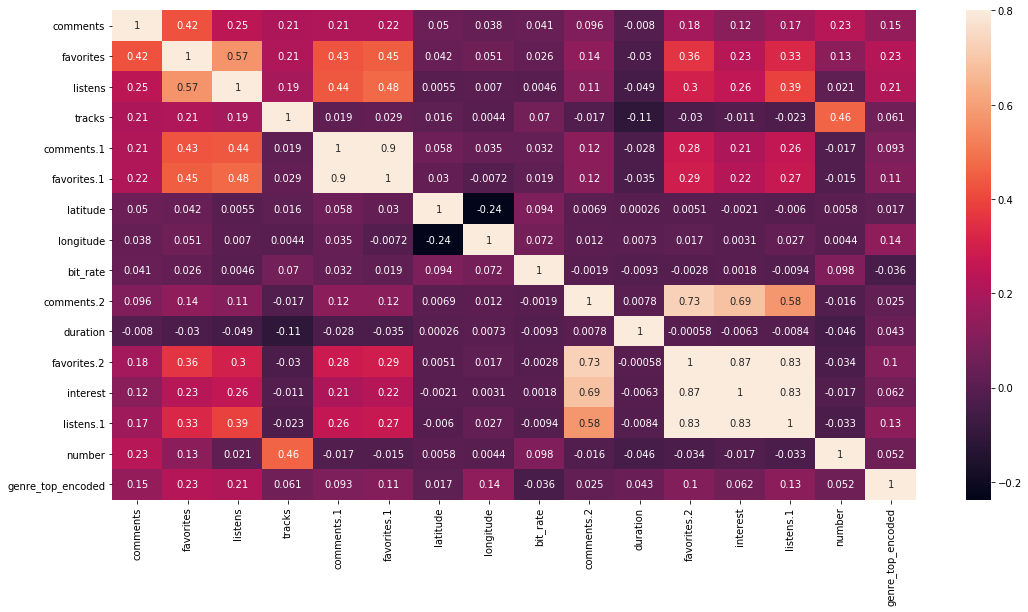

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.concat([X_train, y_train], axis=1)
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=False)

In [132]:
X_train['tracks'].isnull().sum()

0

### Fit Logistic Regression!

In [134]:
features = ['listens', 'tracks']

In [136]:
log_reg = LogisticRegression(solver='lbfgs', multi_class='auto')
log_reg.fit(X_train[features], y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
score = log_reg.score(X_train[features], y_train)
print('Train Accuracy Score:', score)
score = log_reg.score(X_test[features], y_test)
print('Train Accuracy Score:', score)

Train Accuracy Score: 0.17458223394898856
Train Accuracy Score: 0.17551881814984172


This dataset is bigger than many you've worked with so far, and while it should fit in Colab, it can take awhile to run. That's part of the challenge!

Your tasks:
- Clean up the variable names in the dataframe
- Use logistic regression to fit a model predicting (primary/top) genre
- Inspect, iterate, and improve your model
- Answer the following questions (written, ~paragraph each):
  - What are the best predictors of genre?
  - What information isn't very useful for predicting genre?
  - What surprised you the most about your results?

*Important caveats*:
- This is going to be difficult data to work with - don't let the perfect be the enemy of the good!
- Be creative in cleaning it up - if the best way you know how to do it is download it locally and edit as a spreadsheet, that's OK!
- If the data size becomes problematic, consider sampling/subsetting, or [downcasting numeric datatypes](https://www.dataquest.io/blog/pandas-big-data/).
- You do not need perfect or complete results - just something plausible that runs, and that supports the reasoning in your written answers

If you find that fitting a model to classify *all* genres isn't very good, it's totally OK to limit to the most frequent genres, or perhaps trying to combine or cluster genres as a preprocessing step. Even then, there will be limits to how good a model can be with just this metadata - if you really want to train an effective genre classifier, you'll have to involve the other data (see stretch goals).

This is real data - there is no "one correct answer", so you can take this in a variety of directions. Just make sure to support your findings, and feel free to share them as well! This is meant to be practice for dealing with other "messy" data, a common task in data science.

## Resources and stretch goals

- Check out the other .csv files from the FMA dataset, and see if you can join them or otherwise fit interesting models with them
- [Logistic regression from scratch in numpy](https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f) - if you want to dig in a bit more to both the code and math (also takes a gradient descent approach, introducing the logistic loss function)
- Create a visualization to show predictions of your model - ideally show a confidence interval based on error!
- Check out and compare classification models from scikit-learn, such as [SVM](https://scikit-learn.org/stable/modules/svm.html#classification), [decision trees](https://scikit-learn.org/stable/modules/tree.html#classification), and [naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html). The underlying math will vary significantly, but the API (how you write the code) and interpretation will actually be fairly similar.
- Sign up for [Kaggle](https://kaggle.com), and find a competition to try logistic regression with
- (Not logistic regression related) If you enjoyed the assignment, you may want to read up on [music informatics](https://en.wikipedia.org/wiki/Music_informatics), which is how those audio features were actually calculated. The FMA includes the actual raw audio, so (while this is more of a longterm project than a stretch goal, and won't fit in Colab) if you'd like you can check those out and see what sort of deeper analysis you can do.